# All sorts of Sorts

## What is this?
<font color=green>
    <p>
        This is a notebook providing implementations, analyses, and animations of popular sorting algorithms. All of the sorting algorithms run on a shared array (each get their own copy) of randomly generated integers between 0 and 100.
    </p>
</font>

<p>
    Algorithms include:
</p>
<ul>
    <li><b>Bubble sort</b></li>
    <li><b>Insertion sort</b></li>
    <li><b>Selection sort</b></li>
    <li><b>Merge sort</b></li>
    <li><b>Heap sort</b></li>
</ul>

### Glossary
<p>
    <b>Time complexity:</b> the computational complexity describing the time it takes to run an algorithm.
</p>
<p>
    <b>Space complexity:</b> the computational complexity describing the amount of working memory it takes to run an algorithm.
</p>
<p>
    <b>Stable:</b>  a stable sorting algorithm is one where the relative order of array elements of equal value is preserved. Unstable sorting algorithms, on the other hand, don't.
</p>
<p>
    <b>In-place:</b> an in-place algorithm is one that does not need extra space and produces an output in the same memory that contains the input data by manipulating the data 'in-place'.
</p>

In [157]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import copy

In [158]:
%matplotlib notebook
arr = np.random.randint(low=0, high=100, size=50)

Traceback (most recent call last):
  File "c:\users\macke\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "c:\users\macke\appdata\local\programs\python\python37\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
Traceback (most recent call last):
  File "c:\users\macke\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "c:\users\macke\appdata\local\programs\python\python37\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
Traceback (most recent call last):
  File "c:\users\macke\appdata\local\programs\python\python37\lib\site-packag

In [159]:
def animate_sort(sort_fn) -> FuncAnimation:
    '''
    Wrapper function for animating the sorting functions in this notebook.
    Plots a bar chart of the array mentioned above over the iterations of each sorting function.
    
    Args:
        sort_fn: the sorting function to call on the array
        
    Returns:
        FuncAnim: for animation
    '''
    fig=plt.figure()

    x = range(len(arr))
    frames = sort_fn(copy.deepcopy(arr))
    n = len(frames) # Number of frames
    barcollection = plt.bar(x, frames[0])

    def animate(i):
        y = frames[i]
        for i, b in enumerate(barcollection):
            b.set_height(y[i])

    anim = FuncAnimation(fig, animate, repeat=False, blit=True, frames=n, interval=20)
    return anim

In [160]:
def bubble_sort(arr: list) -> list:
    '''
    The poster child for inefficient but feasible sorting.
    Bubble sort iterates through the items in the list and the items bubble up (or down) to their respective positions.
    This is done by repeatedly swapping an element to its position.
    
    Function description:
        Args:
            arr: the array to sort

        Returns:
            A list of frames for animation use
    
    Analysis:
        Time: 
            Worst: O(n^2)
            Best: O(n) [array is already sorted]
            Average: O(n^2)
        Space: O(1)
        Stable: Yes
        In-place: Yes
    '''
    frames = []
    n = len(arr)
    for i in range(n):
        for j in range(n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                frames.append(copy.deepcopy(arr))

    return frames

In [161]:
def insertion_sort(arr: list) -> list:
    '''
    This sorting algorithm builds the sorted array one item at a time. It looks at
    each element and swaps it into its correct place in the sorted subarray.
    It is inefficient for big lists but efficient for small ones. It is also efficient
    for data sets that are already nearly sorted in which the algorithm runs at a 
    time complexity of O(kn) where each element in the input is no more than k places away from
    its sorted position.
    
    Function description:
        Args:
            arr: the array to sort

        Returns:
            A list of frames for animation use
            
    Analysis:
        Time: 
            Worst: O(n^2) [array is sorted in reverse order]
            Best: O(n) [array is already sorted]
            Average: O(n^2)
        Space: O(1)
        Stable: Yes
        In-place: Yes
    '''
    frames = []
    n = len(arr)
    for i in range(1,n):
        cand = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > cand:
            arr[j+1] = arr[j]
            j -= 1
            frames.append(copy.deepcopy(arr))
        arr[j+1] = cand

    return frames

In [162]:
def selection_sort(arr: list) -> list:
    '''
    This sorting algorithm probably dates back to the dawn of sentience when our 
    predecessors sorted their favorite rocks by size.
    Selection sort finds the largest (or smallest) value in the subarray and places it at the end (or front) of the subarray.
    Generally performs worse than insertion sort.
    
    Function description:
        Args:
            arr: the array to sort

        Returns:
            A list of frames for animation use
            
    Analysis:
        Time: 
            Worst, Best, Average: O(n^2)
        Space: O(1)
        Stable: Depends on implementation. In this one, yes.
        In-place: Yes
    '''
    frames = []
    n = len(arr)
    for i in range(n-1, -1, -1):
        swap_index = 0
        for j in range(i):
            if arr[j] > arr[swap_index]:
                swap_index = j
        
        arr[i], arr[swap_index] = arr[swap_index], arr[i]
        frames.append(copy.deepcopy(arr))
    
    return frames

In [163]:
def mergesort_aux(arr: list, left: int, right: int, frames: list) -> None:
    '''
    A divide-and-conquer algorithm where you divide the array up and conquer the problem of sorting on each subdivision.
    Merge sort breaks up the array into smaller subarrays until there is only one element, then merges all of the
    elements in some order until we reach the size of the original array.
    
    Function description:
        Args:
            arr: the array to sort
            left: the left boundary of the subarray
            right: the right boundary of the subarray
            frames: the animation frames

        Returns:
            Nada
            
    Analysis:
        Time: 
            Worst, Best, Average: O(nlogn)
        Space: O(n)
        Stable: Yes
        In-place: Depends on the implementation. In this one, yes.
    '''
    if left < right:
        mid = (left + right) // 2
        mergesort_aux(arr, left, mid, frames)
        mergesort_aux(arr, mid + 1, right, frames)
        
        merge(arr, left, mid, right, frames)

def merge(arr: list, start: int, mid: int, end: int, frames: list) -> list:
    start2 = mid + 1
    
    while start <= mid and start2 <= end:
        if arr[start] <= arr[start2]:
            start += 1
        else:
            val = arr[start2]
            index = start2
            
            while index != start:
                arr[index] = arr[index - 1]
                index -= 1
                
            arr[start] = val
            start += 1
            mid += 1
            start2 += 1
            frames.append(copy.deepcopy(arr))

def mergesort(arr: list) -> list:
    '''Top-level function for animating mergesort'''
    frames = []
    mergesort_aux(arr, 0, len(arr) - 1, frames)
    return frames

In [164]:
def quicksort_aux(arr: list, lo: int, hi: int, frames: list) -> None:
    '''
    Widely regarded as the quickest sorting algorithm due to its quickness. Also it performs better than mergesort and heap sort.
    Also it is cache-efficient because of its contiguous access of memory.
    
    It utilizes the concept of pivot partitioning so its efficiency depends on the choice of pivot.
    In this example, we use the median of three approach where we look at the first, middle and last element, choose the median
    of the three and also sort those three items. Sorting the three items will limit 
    bad pivots choices in following recursive calls.
    
    Function description:
        Args:
            arr: the array to sort

        Returns:
            Nada
            
    Analysis:
        Time: 
            Worst: O(n^2)
            Best: O(nlogn)
            Average: O(nlogn)
        Space: O(logn)
        Stable: No
        In-place: Depends on the implementation. In this one, yes.
    '''
    if lo < hi:
        pivot_index = partition(arr, lo, hi, frames)
        quicksort_aux(arr, lo, pivot_index-1, frames)
        quicksort_aux(arr, pivot_index+1, hi, frames)

def findMedianOfThree(arr: list, lo: int, hi: int) -> int:
    '''
    Finds the median between the the first, middle, and last element.
    Sorts the three values in-place to optimize pivot choices in later calls.
    '''
    mid = (lo+hi) // 2
    if arr[hi] < arr[lo]:
        arr[hi], arr[lo] = arr[lo], arr[hi]
    if arr[mid] < arr[lo]:
        arr[mid], arr[lo] = arr[lo], arr[mid]
    if arr[hi] < arr[mid]:
        arr[hi], arr[mid] = arr[mid], arr[hi]
        
    return mid

def partition(arr: list, lo: int, hi: int, frames: list) -> int:
    pivot_index = findMedianOfThree(arr, lo, hi)
    pivot = arr[pivot_index]
    arr[pivot_index], arr[hi] = arr[hi], arr[pivot_index]
    i = lo - 1
    j = lo

    for j in range(lo, hi):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            frames.append(copy.deepcopy(arr))
    
    arr[i+1], arr[hi] = arr[hi], arr[i+1]
    frames.append(copy.deepcopy(arr))
    return i+1

def quicksort(arr: list) -> list:
    '''Top-level function for animating quicksort'''
    frames = []
    quicksort_aux(arr, 0, len(arr) - 1, frames)
    return frames

In [184]:
def heapsort(arr: list) -> list:
    '''
    A selection-type sorting algorithm where the array represented as a binary tree with the heap property.
    The heapify procedure maintains the following property:
        - in a MAX heap, for any given node C, if P is a parent of C, then the value of P is GREATER than C
        - in a MIN heap, for any given node C, if P is a parent of C, then the value of P is LESS than C
        
    Heapifying an element takes O(logn) time, and doing this on every element in the array results in a total
    run time of O(nlogn).
    The basic idea is to build a max heap and then pop off each value of the max heap and place it into the sorted subarray.
    
    Function description:
        Args:
            arr: the array to sort

        Returns:
            A list to use for animating
            
    Analysis:
        Time: 
            Worst, Best, Average: O(nlogn)
        Space: O(1)
        Stable: No
        In-place: Yes
    '''
    frames = []
    # build the max heap
    n = len(arr)
    for i in range(n, -1, -1):
        heapify(arr, n, i, frames)
    
    # pop from the max heap, and place the value at the end of sorted subarray
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0, frames)

    return frames

def heapify(arr: list, n: int, index: int, frames) -> None:
    '''
    Looks at the current position in the array, compares its value to its children swapping with the largest child.
    
    Args:
        arr: array to sort
        n: used as boundary between unsorted and sorted subarray
        index: current index in the maxheap
    '''
    largest = index
    left = 2*index + 1
    right = 2*index + 2
    if left < n and arr[left] > arr[largest]:
        largest = left
    if right < n and arr[right] > arr[largest]:
        largest = right
    
    if largest == index:
        frames.append(copy.deepcopy(arr))
        return
    
    arr[index], arr[largest] = arr[largest], arr[index]
    frames.append(copy.deepcopy(arr))
    heapify(arr, n, largest, frames)

<IPython.core.display.Javascript object>


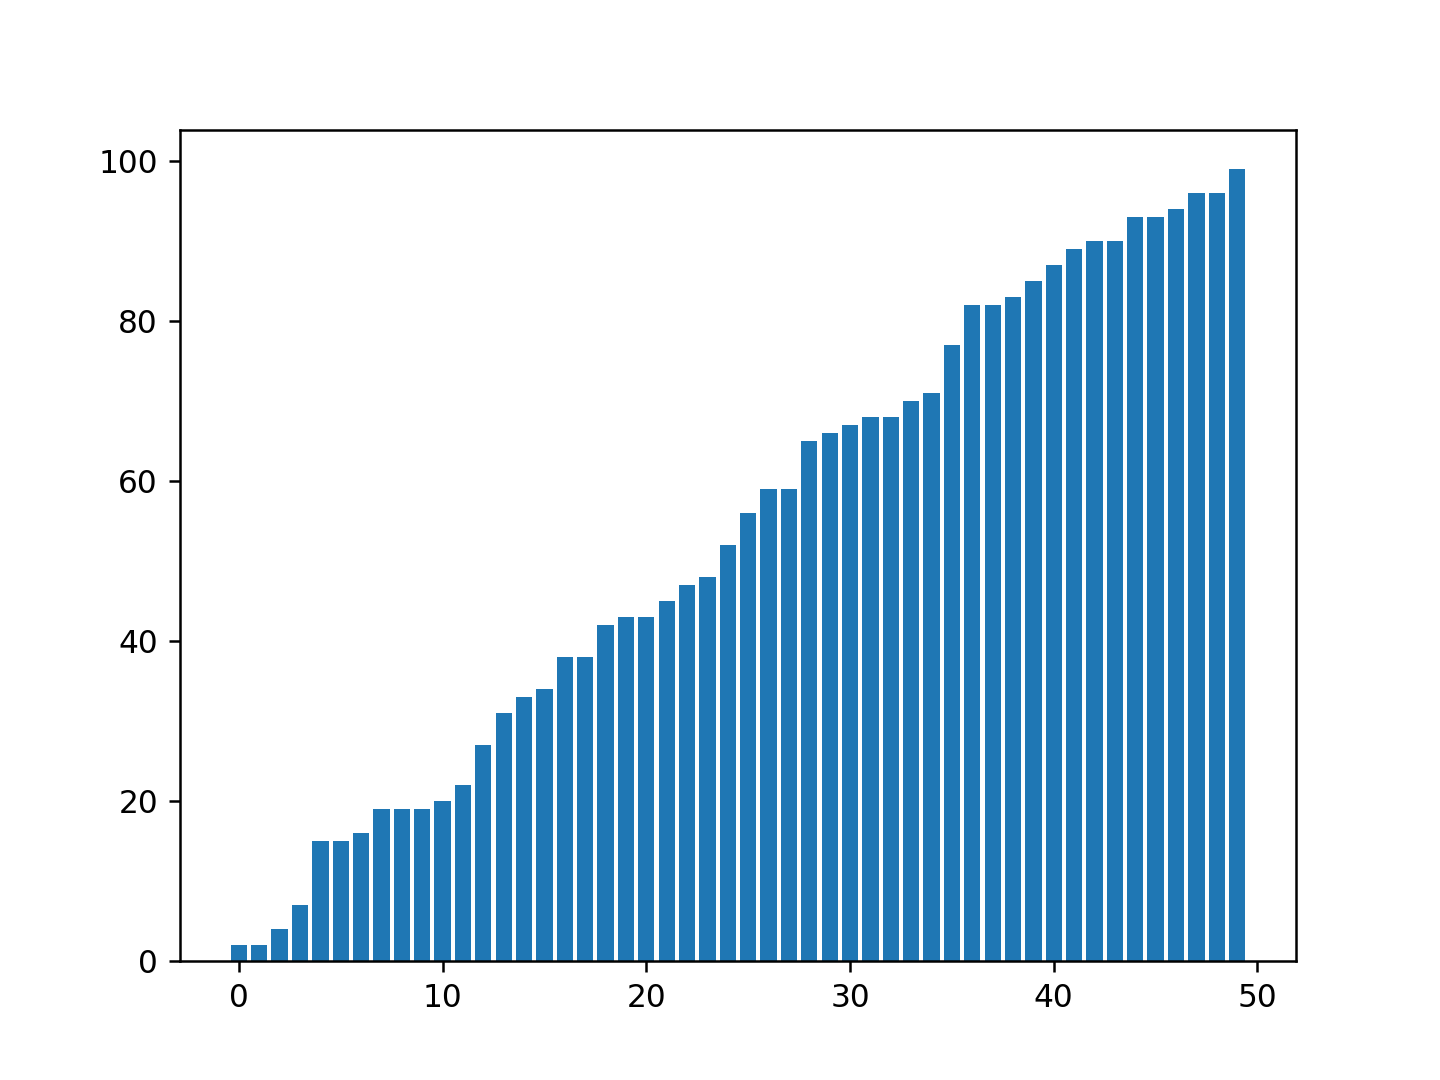

In [165]:
animate_sort(insertion_sort)

<IPython.core.display.Javascript object>


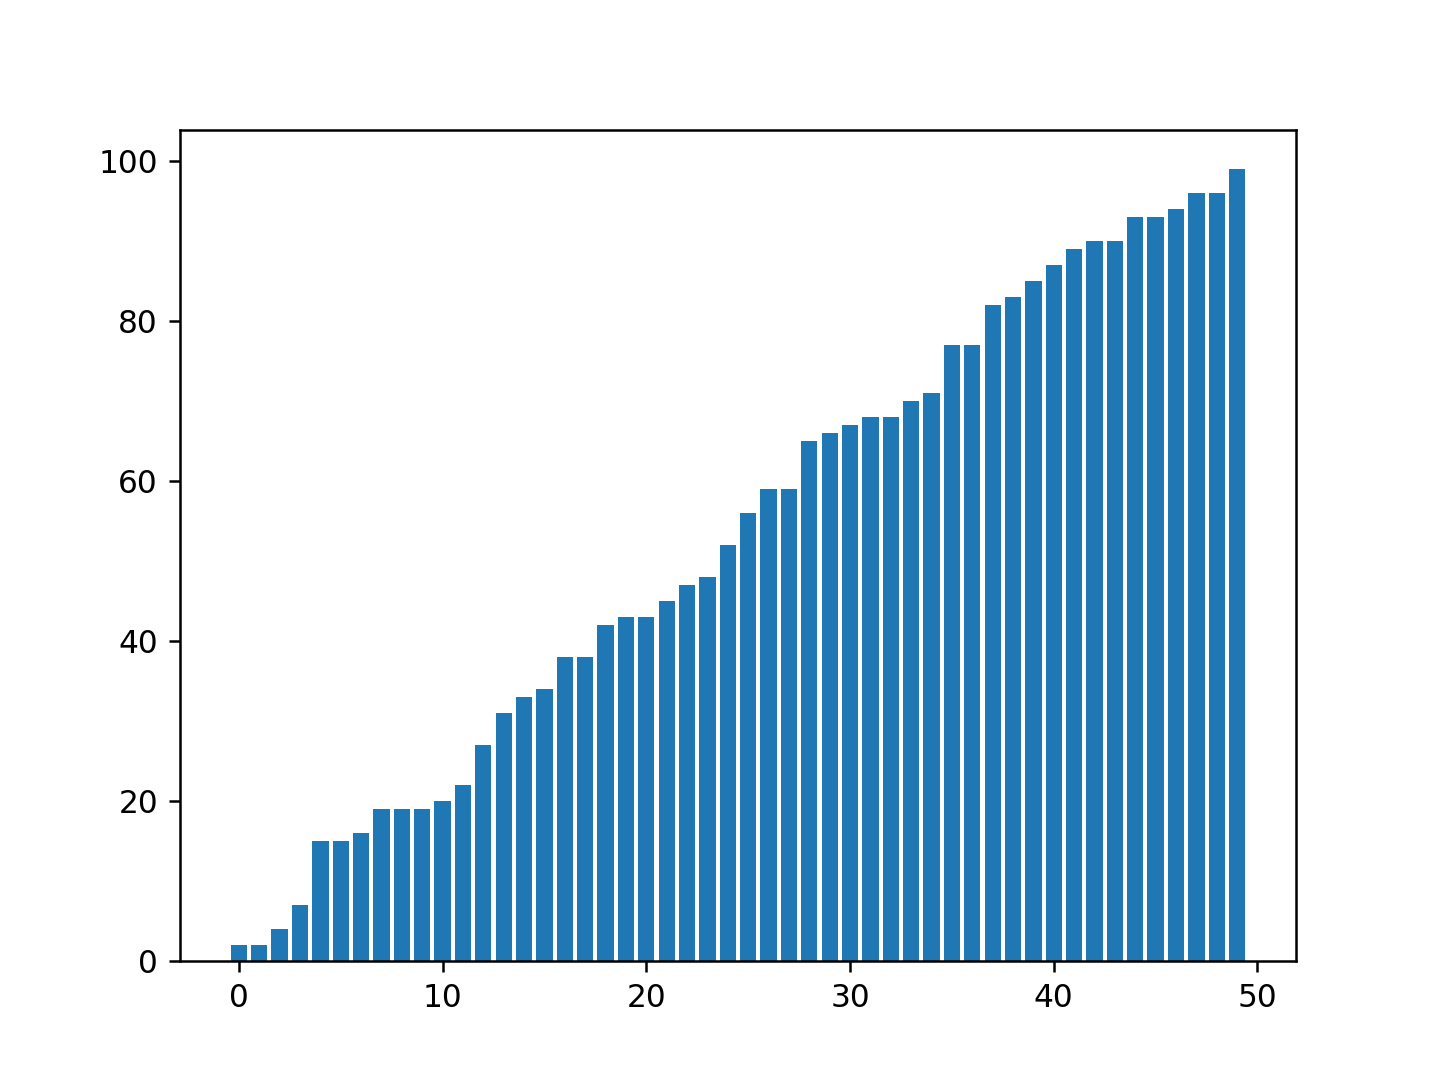

In [166]:
animate_sort(mergesort)

<IPython.core.display.Javascript object>


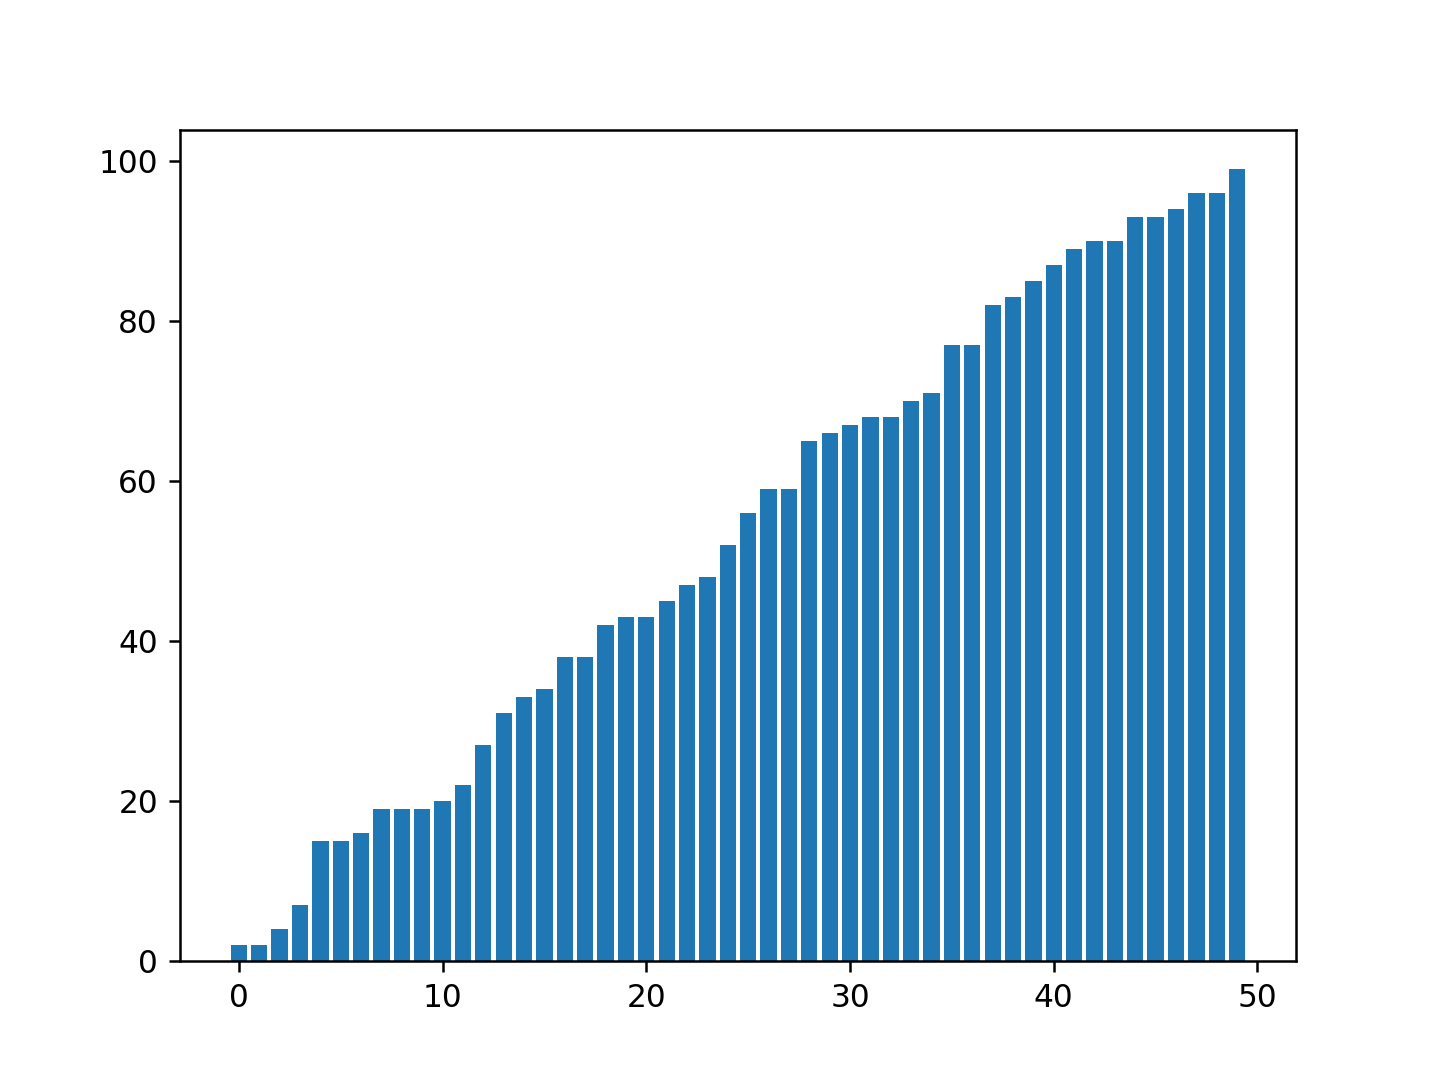

In [167]:
animate_sort(quicksort)

<IPython.core.display.Javascript object>


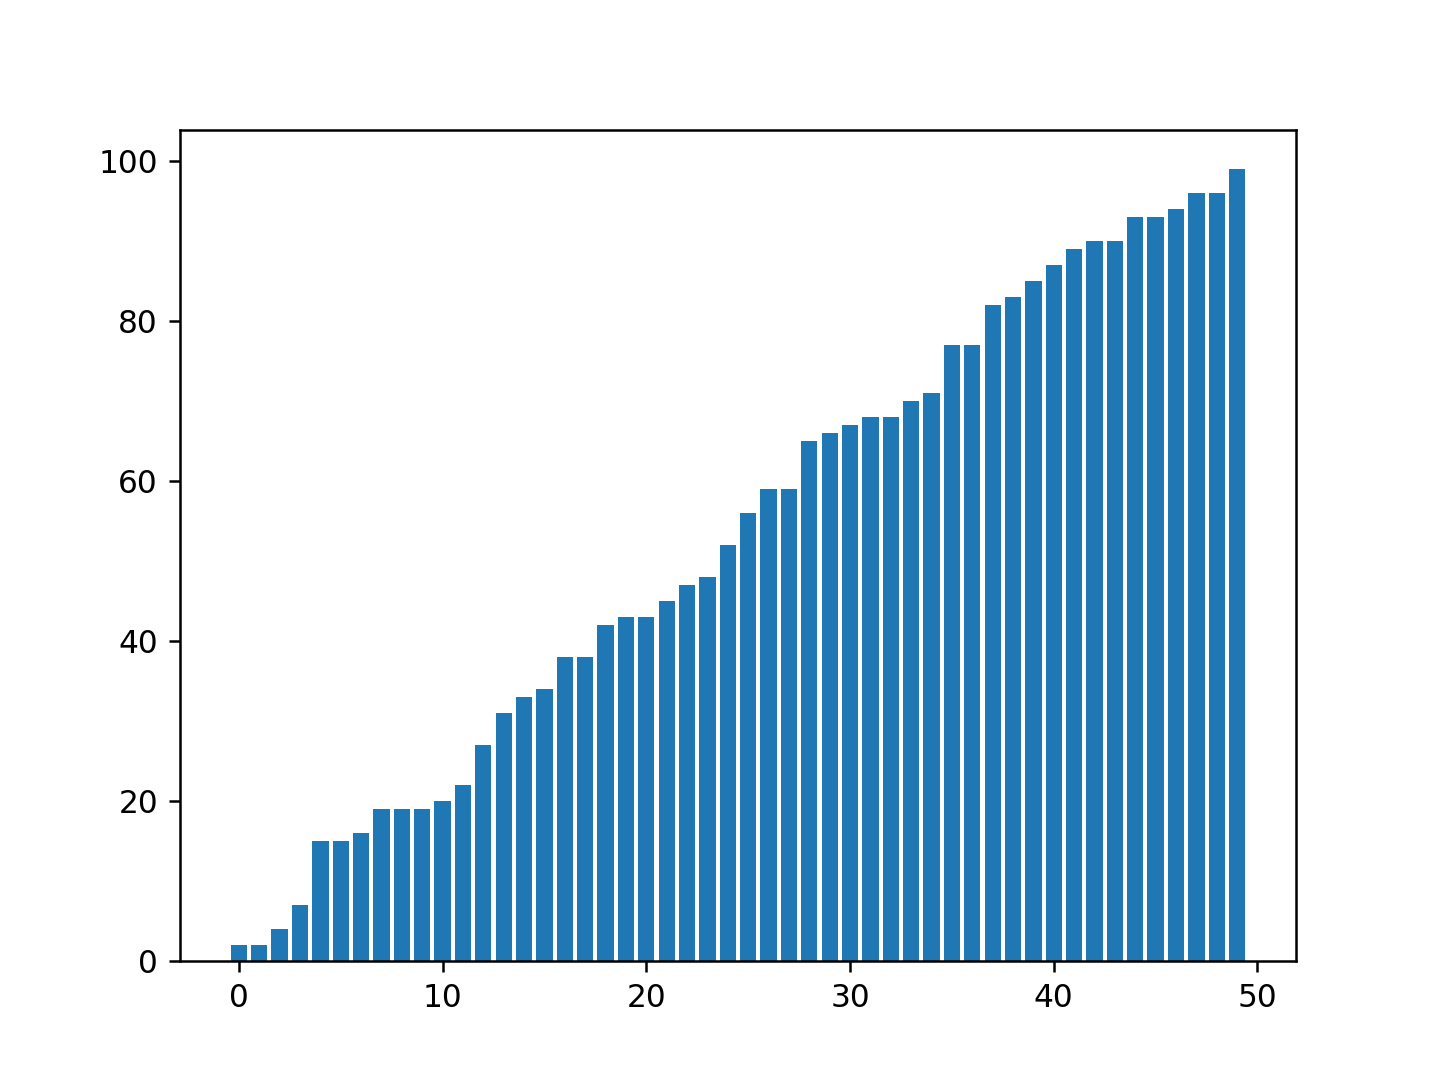

[ 2  2  4  7 15 15 16 19 19 19 20 22 27 31 33 34 38 38 42 43 43 45 47 48
 52 56 59 59 65 66 67 68 68 70 71 77 77 82 83 85 87 89 90 90 93 93 94 96
 96 99]


In [185]:
animate_sort(heapsort)